In [1]:
import keras
#from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
model_file = './model/weights.epoch_02.hdf5'
model = keras.models.load_model(model_file)

In [18]:
testing_dir = r"data"
rescale = 1./255
target_size = (150, 150)
class_mode = "categorical"

In [4]:
test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    class_mode=class_mode,
    shuffle = False)

Found 1 images belonging to 1 classes.


In [3]:
#import matplotlib.pyplot as plt
#import tensorflow.keras as tfk
import numpy as np
#import pandas as pd
#import skimage
import os
import cv2
import tqdm
import skimage.transform
def extract_data(path_directory):
    X = []
    y = []
    for nextdirectory in os.listdir(path_directory):
        if not nextdirectory.startswith('.'):
            if nextdirectory in ['NORMAL']:
                label = 0
            elif nextdirectory in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = path_directory + nextdirectory
                
            for file in tqdm.tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [4]:
TEST_PATH = "./data/test/"
X_test , y_test = extract_data(TEST_PATH)

100%|██████████| 2/2 [00:00<00:00,  3.58it/s]


In [7]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
print(pred[0])

1


In [3]:
#import matplotlib.pyplot as plt
#import tensorflow.keras as tfk
import numpy as np
#import pandas as pd
#import skimage
#import os
import cv2
#import tqdm
import skimage.transform
X = []
img = cv2.imread('./data/person1_virus_6.jpeg')
if img is not None:
    img = skimage.transform.resize(img, (150, 150, 3))
    img = np.asarray(img)
    X.append(img)
                    
X_test1 = np.asarray(X)

In [4]:
pred = model.predict(X_test1)
pred = np.argmax(pred,axis = 1) 
print(pred[0])

1


In [5]:
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)  
y_pred = y_pred.argmax(axis=-1)
y_true=test_generator.classes

1/1 [==============================] - 0s 249ms/step


In [10]:
def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [11]:
def get_reset_subplot_params(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

In [12]:
class_map = {v: k for k, v in test_generator.class_indices.items()}
print(class_map)
dpi=100
ncols = 1
nrows = 1
subplot_params = get_reset_subplot_params(nrows, ncols, dpi)
plot_params = get_reset_plot_params()

{0: 'N', 1: 'P'}


In [19]:
def show_predictions(y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, count=1, sample=True):
    fig, axs = get_fig_axs(subplot_params)
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    
    file_names = test_generator.filenames
    #print(testing_dir+"/"+ file_names[1])
    m = {}
    length = len(y_true)
    for i in range(0, count): 
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = int(random.randint(0, length-1))

            m[num]=1


        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        img = cv2.imread(testing_dir+"/"+ file_names[num], 1)
        plt.imshow(img)

        plt.xticks([])
        plt.yticks([])
        
        
        original = class_map[y_true[num]]
        predicted = class_map[y_pred[num]]
        
        
        title_text = ("%s%s%s%s%s"%("True: ", original, "\n", "Pred: ", predicted))
        print(predicted)
        print(title_text)
        print('san')
        print(y_true[num])
        
        if original==predicted:
            plt.title(title_text)
        else:
            plt.title(title_text, color='red')

    plt.tight_layout()
    plt.show()

N
True: P
Pred: N
san
1


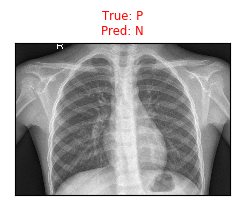

In [20]:
count = 1
show_predictions(y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, count=count, sample=True)

In [15]:
def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs

In [3]:
import matplotlib.pyplot as plt

In [4]:
import random

In [5]:
import cv2

In [6]:
predicted = y_pred[0]

In [33]:
print(pred[0])

0


In [ ]:
predict(x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)